In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [2]:
ppd=pd.read_csv('laptop_price.csv')
ppd.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
ppd.shape

(1303, 13)

In [4]:
ppd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
ppd.Price_euros.value_counts()

1099.00    14
1799.00    14
1499.00    14
899.00     11
1299.00    11
           ..
1877.00     1
1672.00     1
443.99      1
1244.00     1
415.00      1
Name: Price_euros, Length: 791, dtype: int64

In [6]:
ppd.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
ppd.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
ppd.Weight.value_counts()

2.2kg      121
2.1kg       58
2.4kg       44
2.3kg       41
2.5kg       38
          ... 
2.83kg       1
1.14kg       1
2.191kg      1
4.4kg        1
3.74kg       1
Name: Weight, Length: 179, dtype: int64

# Data Preprocessing

In [9]:
ppd1=ppd.copy()
ppd1['Price(INR)']=87.32*ppd['Price_euros']
ppd1['Weight(Kg)']=ppd.Weight.str.replace('kg','')
ppd1['RAM(GB)']=ppd.Ram.str.replace('GB','')
ppd1["RAM(GB)"] = ppd1["RAM(GB)"].astype(str).astype(int)
ppd1["Weight(Kg)"] = ppd1["Weight(Kg)"].astype(str).astype(float)
ppd1['Price(INR)'] = ppd1["Price(INR)"].astype(str).astype(float)
x=ppd1['ScreenResolution'].value_counts(ascending=False)
y=x[x<10]
ppd1.ScreenResolution = ppd1.ScreenResolution.apply(lambda a: 'Others' if a in y else a)
p=ppd1['Gpu'].value_counts(ascending=False)
q=p[p<10]
ppd1.Gpu = ppd1.Gpu.apply(lambda a: 'Others' if a in q else a)
m=ppd1['Memory'].value_counts(ascending=False)
n=m[m<10]
ppd1.Memory = ppd1.Memory.apply(lambda a: 'Others' if a in n else a)
c=ppd1['Cpu'].value_counts(ascending=False)
d=c[c<10]
ppd1.Cpu = ppd1.Cpu.apply(lambda a: 'Others' if a in d else a)
a=ppd1['Company'].value_counts(ascending=False)
s=a[a<5]
ppd1.Company = ppd1.Company.apply(lambda a: 'Others' if a in s else a)

In [10]:
ppd1.drop(['Price_euros','Weight','Ram','laptop_ID'],axis=1,inplace=True)
ppd1.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price(INR),Weight(Kg),RAM(GB)
0,Apple,MacBook Pro,Ultrabook,13.3,Others,Others,128GB SSD,Others,macOS,116981.7308,1.37,8
1,Apple,Macbook Air,Ultrabook,13.3,Others,Others,Others,Others,macOS,78495.4408,1.34,8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,50209.0000,1.86,8
3,Apple,MacBook Pro,Ultrabook,15.4,Others,Others,512GB SSD,Others,macOS,221570.1340,1.83,16
4,Apple,MacBook Pro,Ultrabook,13.3,Others,Others,256GB SSD,Others,macOS,157490.3520,1.37,8


In [11]:
ppd1.shape

(1303, 12)

In [12]:
ppd1.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Memory               object
Gpu                  object
OpSys                object
Price(INR)          float64
Weight(Kg)          float64
RAM(GB)               int32
dtype: object

# Data Visualisation

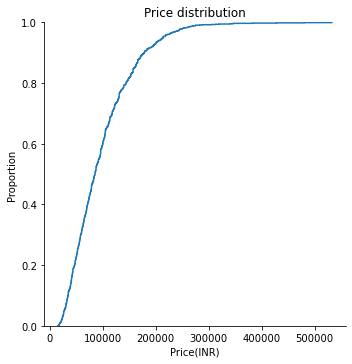

In [13]:
sns.displot(x='Price(INR)',data=ppd1,kind='ecdf')
plt.title("Price distribution")
plt.show()

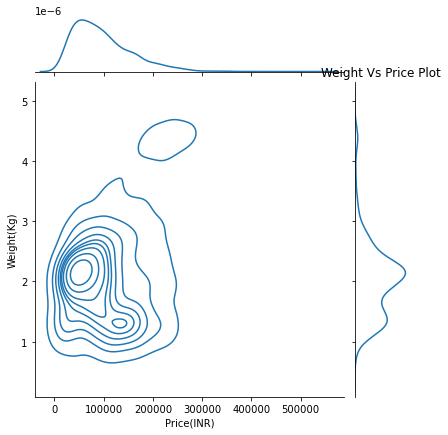

In [14]:
sns.jointplot(x='Price(INR)',y='Weight(Kg)',data=ppd1,kind='kde')
plt.title("Weight Vs Price Plot")
plt.show()

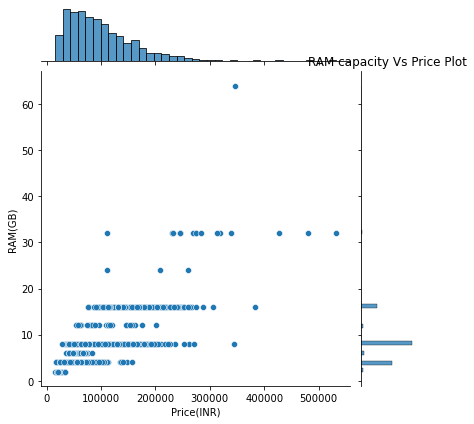

In [15]:
sns.jointplot(x='Price(INR)',y='RAM(GB)',data=ppd1)
plt.title("RAM capacity Vs Price Plot")
plt.show()

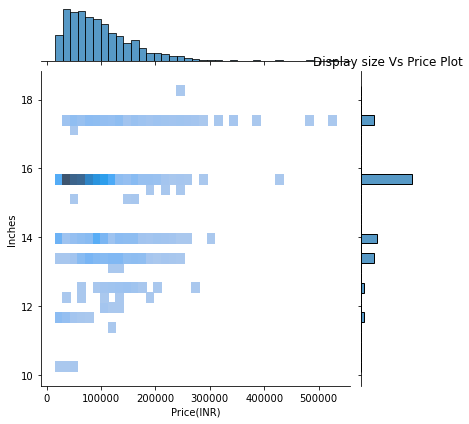

In [16]:
sns.jointplot(x='Price(INR)',y='Inches',data=ppd1,kind='hist')
plt.title("Display size Vs Price Plot")
plt.show()

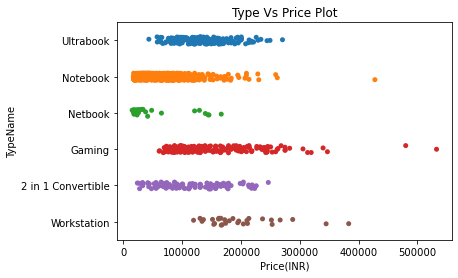

In [17]:
sns.stripplot(x='Price(INR)',y='TypeName',data=ppd1,jitter=True)
plt.title("Type Vs Price Plot")
plt.show()

C:\Users\vishak\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vishak\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vishak\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vishak\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vishak\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the p

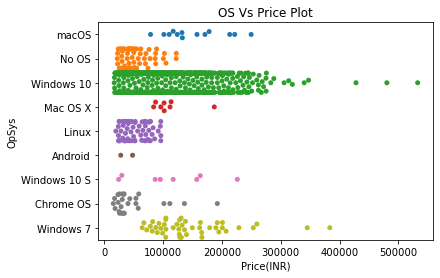

In [18]:
sns.swarmplot(x='Price(INR)',y='OpSys',data=ppd1)
plt.title("OS Vs Price Plot")
plt.show()

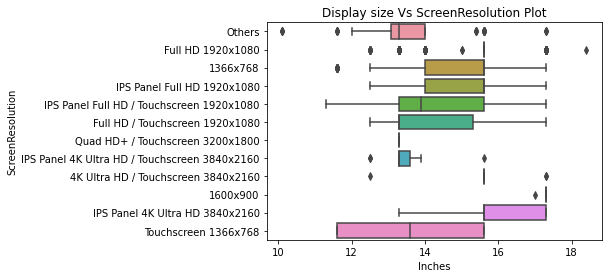

In [19]:
sns.boxplot(x='Inches',y='ScreenResolution',data=ppd1)
plt.title("Display size Vs ScreenResolution Plot")
plt.show()

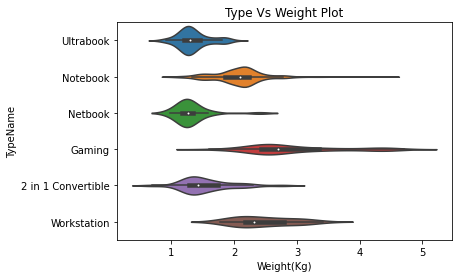

In [20]:
sns.violinplot(x='Weight(Kg)',y='TypeName',data=ppd1)
plt.title("Type Vs Weight Plot")
plt.show()

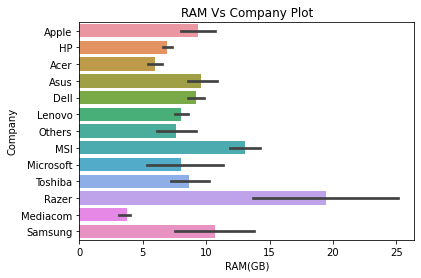

In [21]:
sns.barplot(x='RAM(GB)',y='Company',data=ppd1)
plt.title("RAM Vs Company Plot")
plt.show()

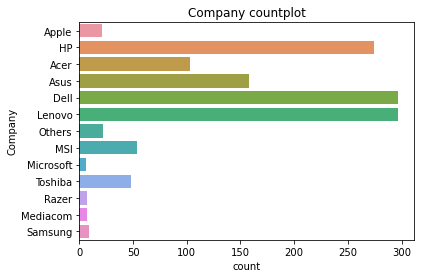

In [22]:
sns.countplot(y='Company',data=ppd1)
plt.title("Company countplot")
plt.show()

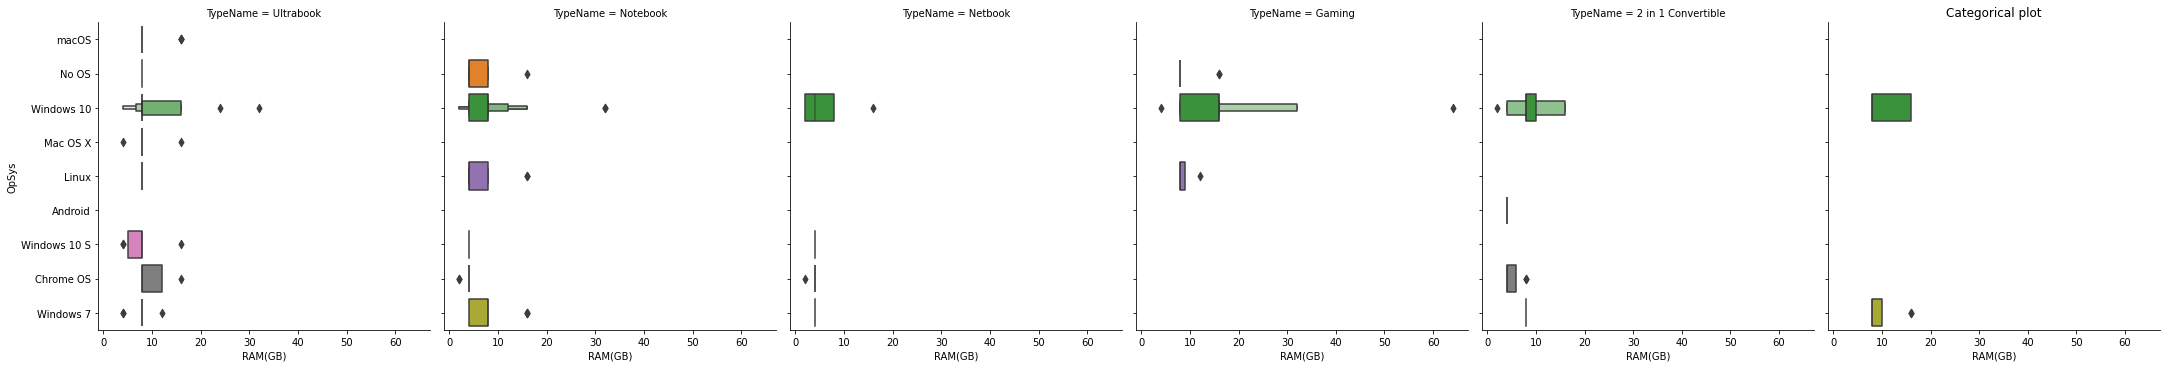

In [23]:
sns.catplot(x='RAM(GB)',y='OpSys',col='TypeName',kind='boxen',data=ppd1)
plt.title("Categorical plot")
plt.show()

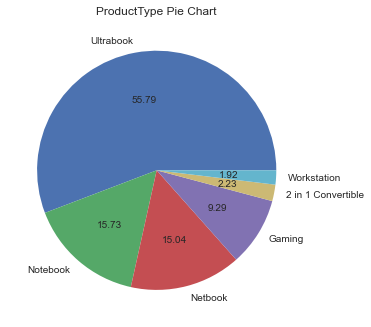

In [24]:
plt.style.use('seaborn')
plt.pie(ppd1.TypeName.value_counts(),labels=ppd1.TypeName.unique(), autopct='%.2f')
plt.title('ProductType Pie Chart')
plt.show()

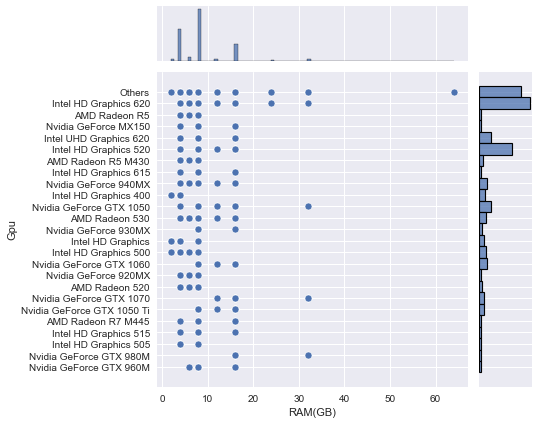

In [25]:
sns.jointplot(x='RAM(GB)',y='Gpu',data=ppd1)


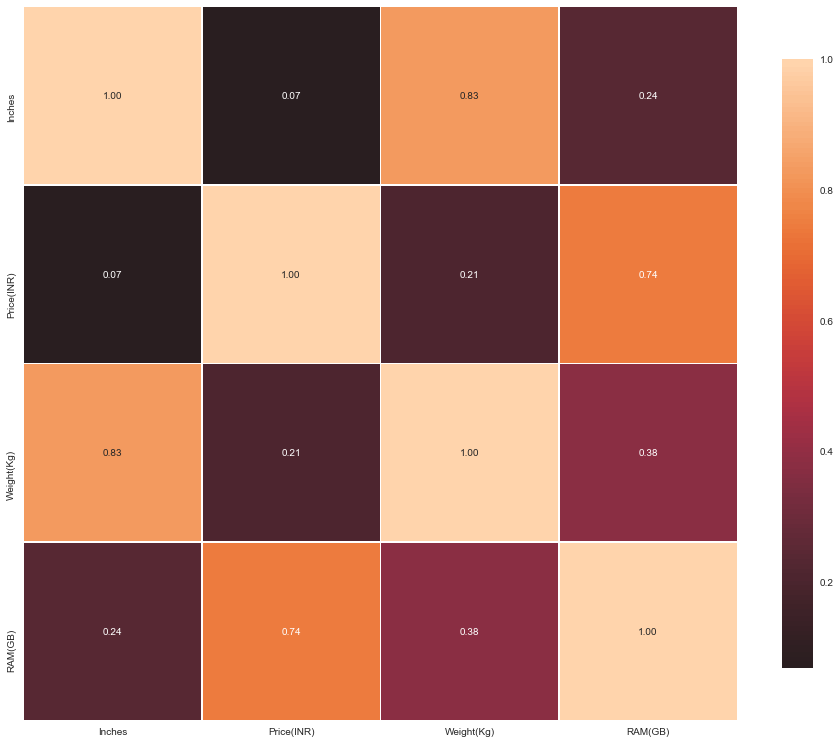

In [26]:
def correlation_heatmap(train):
    correlations = train.corr()
    
    fig, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
correlation_heatmap(ppd1)

# Feature Engineering and Outlier Detection

# Data Encoding

In [27]:
ppd2=ppd1.copy()

In [28]:
ppd2

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price(INR),Weight(Kg),RAM(GB)
0,Apple,MacBook Pro,Ultrabook,13.3,Others,Others,128GB SSD,Others,macOS,116981.7308,1.37,8
1,Apple,Macbook Air,Ultrabook,13.3,Others,Others,Others,Others,macOS,78495.4408,1.34,8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,50209.0000,1.86,8
3,Apple,MacBook Pro,Ultrabook,15.4,Others,Others,512GB SSD,Others,macOS,221570.1340,1.83,16
4,Apple,MacBook Pro,Ultrabook,13.3,Others,Others,256GB SSD,Others,macOS,157490.3520,1.37,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,128GB SSD,Intel HD Graphics 520,Windows 10,55710.1600,1.80,4
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Others,Intel Core i7 6500U 2.5GHz,512GB SSD,Intel HD Graphics 520,Windows 10,130892.6800,1.30,16
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,64GB Flash Storage,Intel HD Graphics,Windows 10,19996.2800,1.50,2
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,1TB HDD,Others,Windows 10,66712.4800,2.19,6


In [29]:
column = [Predictor for Predictor in ppd2.columns if ppd2[Predictor].dtype == 'O']
for Predictor in column:
    labels_ordered= ppd2.groupby([Predictor])['Price(INR)'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    ppd2[Predictor]=ppd2[Predictor].map(labels_ordered)
ppd2.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price(INR),Weight(Kg),RAM(GB)
0,9,559,3,13.3,7,13,5,18,8,116981.7308,1.37,8
1,9,333,3,13.3,7,13,6,18,8,78495.4408,1.34,8
2,3,107,1,15.6,3,9,7,15,2,50209.0000,1.86,8
3,9,559,3,15.4,7,13,11,18,8,221570.1340,1.83,16
4,9,559,3,13.3,7,13,7,18,8,157490.3520,1.37,8
5,1,84,1,15.6,1,5,2,3,4,34928.0000,2.10,4
6,9,559,3,15.4,7,13,6,18,5,186862.1804,2.04,16
7,9,333,3,13.3,7,13,6,18,8,101177.6840,1.34,8
8,5,470,3,14.0,3,14,11,11,4,130543.4000,1.30,16
9,1,244,3,14.0,5,10,7,17,4,67236.4000,1.60,8


In [30]:
ppd2['OpSys'].unique()

array([8, 2, 4, 5, 3, 0, 6, 1, 7], dtype=int64)

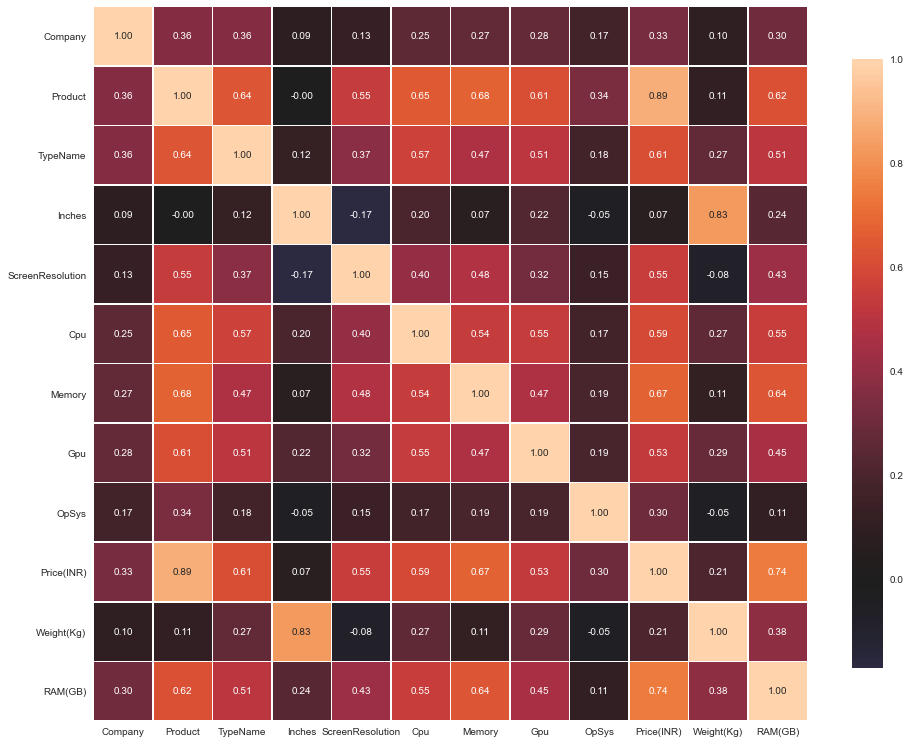

In [31]:
def correlation_heatmap(train):
    correlations = train.corr()
    
    fig, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
correlation_heatmap(ppd2)

# Data Modelling

In [32]:
#splitting into X and y
X=ppd2.drop(['Price(INR)'],axis=1)
y=ppd2['Price(INR)']

In [33]:
X

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Weight(Kg),RAM(GB)
0,9,559,3,13.3,7,13,5,18,8,1.37,8
1,9,333,3,13.3,7,13,6,18,8,1.34,8
2,3,107,1,15.6,3,9,7,15,2,1.86,8
3,9,559,3,15.4,7,13,11,18,8,1.83,16
4,9,559,3,13.3,7,13,7,18,8,1.37,8
...,...,...,...,...,...,...,...,...,...,...,...
1298,4,193,2,14.0,4,16,5,12,4,1.80,4
1299,4,472,2,13.3,7,16,11,12,4,1.30,16
1300,4,12,1,14.0,1,2,1,2,4,1.50,2
1301,3,243,1,15.6,1,16,4,18,4,2.19,6


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=16)

In [35]:
len(X_train)

912

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [37]:
lr.coef_

array([ -395.90400436,   250.43331212,  1264.78785788, -1605.87148726,
        1756.29001043,  -703.43558516,   534.61754316,  -609.80493023,
        2346.73681061,  8059.73388857,  3432.92215115])

In [38]:
lr.intercept_

-5638.096055866074

In [39]:
y_pred=lr.predict(X_test)
y_pred

array([125488.74084409,  64078.07648663, 155428.26719563,  22383.26910583,
        50663.41282394,  75625.82987629,  25166.6195609 , 162376.46137904,
       146466.76905323,  15692.83739508,  72325.37439868,   2572.8936088 ,
        15080.55643352,  38029.19043632, 156586.60693845, 147617.63701581,
       258415.7053252 ,  48692.95753772, 154767.24196593,  77257.49462329,
        90880.04862258,  38429.09354279,  16166.86216603,  25052.19227682,
        71383.18859809,  59385.23802963, 147317.2540012 ,  33674.41783664,
        38805.88403166, 159655.95539562, 133027.62725237,  77526.30728023,
       144198.68900308, 190024.49289016, 140355.74354089,  19900.95399812,
        18039.57420569,  33749.26602423,  35759.69677721,  53407.28064555,
        20251.24263775,   2821.88935703,  53975.64910763,  48694.7088102 ,
        28215.6272124 ,  24224.38753592,  24837.50000219, 126295.40352377,
       114020.54353339, 144822.45406124,  75101.17740737, 129430.15646339,
       169828.67129133, 1

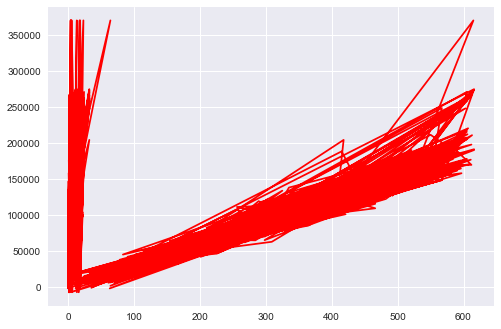

In [40]:
plt.plot(X_train,lr.predict(X_train),color='red')

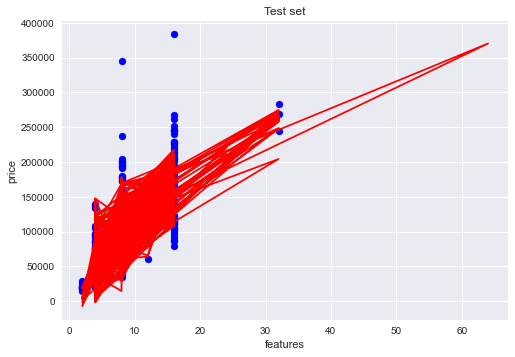

In [41]:
plt.scatter(X_test['RAM(GB)'] , y_test, color='blue')
plt.plot(X_train['RAM(GB)'],lr.predict(X_train),color='red')
plt.title('Test set')
plt.xlabel('features')
plt.ylabel('price')
plt.show()

In [42]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))# similar to accuracy

MAE: 15118.170474475693
MSE: 506192727.90786266
RMSE: 122.9559696577425


In [43]:
lr.score(X_test,y_test)

0.8572848316251964

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9286991560816555

# KFold

In [45]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
kfold_validation=KFold(10)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.83923704 0.80894922 0.92280744 0.5682467  0.85978552 0.83685381
 0.75301992 0.84909419 0.79572    0.8976479 ]
0.8131361732866571


# ShuffleSplit

In [46]:
#test-train+kfold
from sklearn.model_selection import ShuffleSplit
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
res=cross_val_score(rf,X,y,cv=ssplit)

In [47]:
np.mean(res)

0.9270361094323107

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [49]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['mse','mae'],
                'n_estimators': [100,10,50]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    gs=pd.DataFrame(scores,columns=['model','best_score','best_params'])
    return gs
grid=find_best_model_using_gridsearchcv(X,y)

In [56]:
grid

,model,best_score,best_params
0,linear_regression,0.838905,{'normalize': True}
1,lasso,0.838906,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.854859,"{'criterion': 'mse', 'splitter': 'best'}"
3,random_forest,0.928276,"{'criterion': 'mse', 'n_estimators': 100}"


In [60]:

rf_best = RandomForestRegressor(n_estimators=100,criterion='mse')
rf_best.fit(X_train, y_train)
y_pred=rf_best.predict(X_test)
len(y_pred)

391

In [107]:
#len(y_test)
str(154032.48)
y_pred[1]

72827.79648800005

In [113]:
y_test.values[8]

147570.8

In [114]:
#final_model = grid_search.best_estimator_
#y_pred = rf_best.predict(X_test)
#y_pred = y_pred.tolist()
for pred in range(0, len(y_pred)):
    print("Prediction: " +str(y_pred[pred]) +" Actual: " + str(y_test.values[pred]))
    #print("Prediction: " + str(round(y_pred[pred], 2)) + " Actual: " + str(y_test[pred]))

Prediction: 102563.40873999996 Actual: 112206.2
Prediction: 72827.79648800005 Actual: 74213.268
Prediction: 155961.19542800004 Actual: 174028.75999999998
Prediction: 26243.152800000003 Actual: 26108.679999999997
Prediction: 48618.74562399997 Actual: 49685.079999999994
Prediction: 67588.75366400005 Actual: 79679.5
Prediction: 36389.46610799999 Actual: 39032.03999999999
Prediction: 171701.15808 Actual: 204241.47999999998
Prediction: 139174.86848399983 Actual: 147570.8
Prediction: 27934.523735999992 Actual: 34359.5468
Prediction: 66918.40675600003 Actual: 64529.479999999996
Prediction: 20590.75456000001 Actual: 19996.28
Prediction: 25721.51185200001 Actual: 24973.519999999997
Prediction: 38846.82554799995 Actual: 31347.879999999997
Prediction: 140299.36671199996 Actual: 122509.95999999999
Prediction: 162921.97035199986 Actual: 171933.08
Prediction: 263820.6582200001 Actual: 282916.8
Prediction: 45763.16332399999 Actual: 42699.479999999996
Prediction: 141177.50902399994 Actual: 152722.68
P

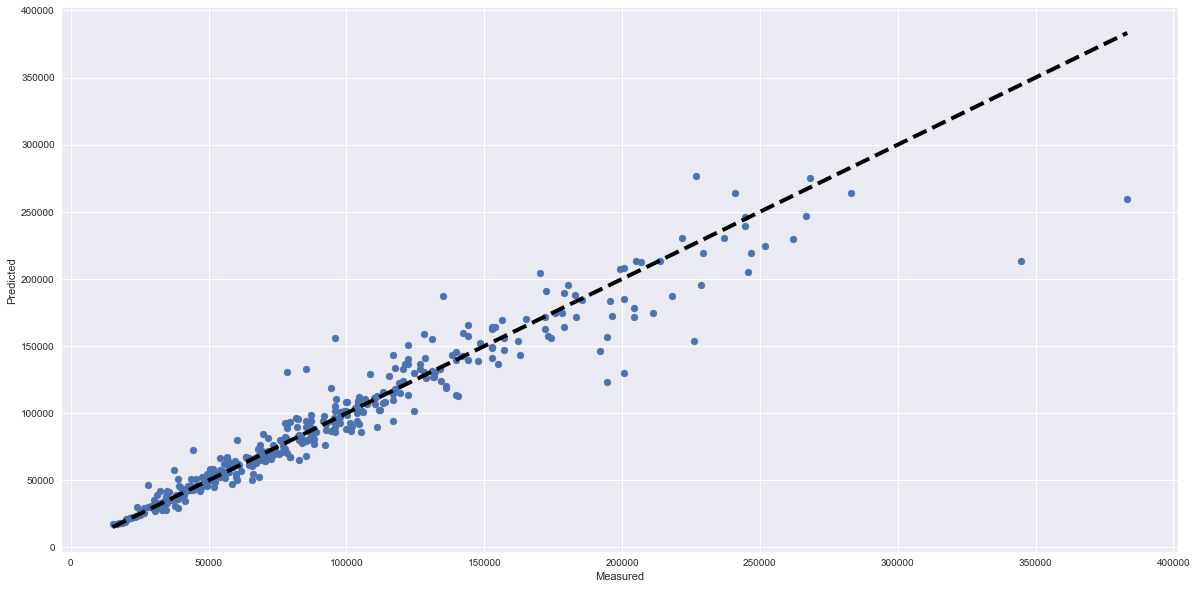

In [118]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.show()